In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ai research/stiffened_data.csv')

In [ ]:
df


,l,r,t,Ic,h,Ls,Pd,Pn
0,4000,4000,19.032019,4.807114e+08,300,510.439359,3.016575,44.762297
1,4000,4000,22.204022,6.057656e+08,350,551.337521,3.519337,52.222679
2,4000,4000,25.376025,7.401036e+08,400,589.404603,4.022100,59.683062
3,4000,4000,28.548028,8.831232e+08,450,625.157987,4.524863,67.143445
4,4000,4000,31.720032,1.034326e+09,500,658.974379,5.027625,74.603828
...,...,...,...,...,...,...,...,...
37510,10000,8000,101.504101,3.349326e+10,800,1667.087965,8.044200,103.998578
37511,10000,8000,107.848107,3.668182e+10,850,1718.394942,8.546962,110.498489
37512,10000,8000,114.192114,3.996559e+10,900,1768.213808,9.049725,116.998400
37513,10000,8000,120.536120,4.334190e+10,950,1816.666993,9.552487,123.498311


In [ ]:
X = df[['l', 'r','h']]  # Input features
y = df['Pn']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
NN_model = Sequential()

In [ ]:
NN_model.add(Dense(10, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))


In [ ]:
NN_model.add(Dense(10, kernel_initializer='normal',activation='relu'))


In [ ]:
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [ ]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
history=NN_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/50
640/657 [============================>.] - ETA: 0s - loss: 1.2824 - mean_absolute_error: 1.2824
Epoch 1: val_loss did not improve from 1.14338
657/657 [==============================] - 2s 4ms/step - loss: 1.2795 - mean_absolute_error: 1.2795 - val_loss: 1.2125 - val_mean_absolute_error: 1.2125
Epoch 2/50
652/657 [============================>.] - ETA: 0s - loss: 1.2858 - mean_absolute_error: 1.2858
Epoch 2: val_loss did not improve from 1.14338
657/657 [==============================] - 2s 3ms/step - loss: 1.2874 - mean_absolute_error: 1.2874 - val_loss: 1.5932 - val_mean_absolute_error: 1.5932
Epoch 3/50
650/657 [============================>.] - ETA: 0s - loss: 1.2843 - mean_absolute_error: 1.2843
Epoch 3: val_loss did not improve from 1.14338
657/657 [==============================] - 2s 3ms/step - loss: 1.2872 - mean_absolute_error: 1.2872 - val_loss: 1.7650 - val_mean_absolute_error: 1.7650
Epoch 4/50
656/657 [============================>.] - ETA: 0s - loss: 1.2950 - 

In [ ]:
import math
from sklearn.metrics import mean_squared_error

predictions = NN_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)

# Calculate RMSE
rmse = math.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")


352/352 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 1.7237122056821004


In [ ]:
from sklearn.metrics import r2_score
y_pred = NN_model.predict(X_test)

# Calculate Mean Squared Error and R2 score to evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

352/352 [==============================] - 1s 2ms/step


In [ ]:
print(f"Best R2 Score: {r2}")

Best R2 Score: 0.9972648070521617


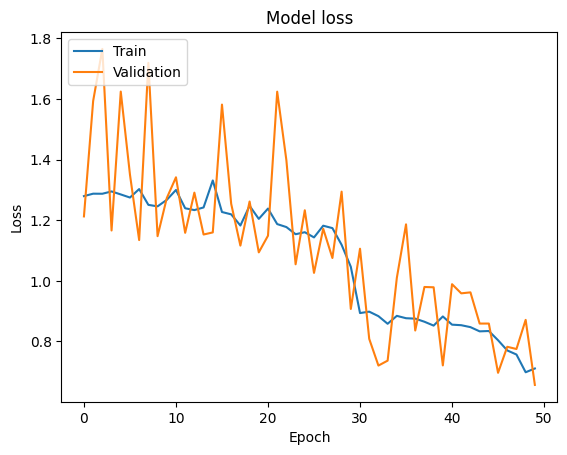

In [ ]:
import matplotlib.pyplot as plt

# Assuming history is the result returned by model.fit()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values (if applicable)
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
